In [99]:
###ideas

# 1. split into sweet and not sweet red/white wine to see if sweet or dry wine is rated better
# 2. heatmap (only half) for the correlation plot 
# 3. 


###Observations
#1. higher mean sulfates and mean volatile acidity in red wine than white wine
#2. mean pH is slightly lower in white wine (3.1 vs 3.3)
#3. mean free sulfur dioxides and total sulfur dioxide is higher in white wine (white: 35.3 free and 138.46 in total, vs. red: 15.87 free and only 46.47 total)
#4. mean chlorides is 2x higher in red wine (red: 0.08 vs white: 0.04)
#5. mean sugar in white wine significantly higher (white: 6.4 vs red: 2.5)
#6. mean fixed acidity higher in red whine (red: 8.32 vs white 6.85)

#Read on vino verde region, apparently they dont sell alot of high quality wines, mostly young wines 
#find average composition of a wine based on its quality
#build a Wine Quality Analytics System to help them determine the quality of wines based on their composition.
#acidity and tannins are likely to be high in younger wines (less smooth/rounded)


#Vinho verde:
#-northern portugese wine from the Minho province (an old province dissolved in 1976)
#-Not actually a grape type but a DOC for producing wine 
# mandatory to make wine within 3-6 months after harvest 
#can be red, rose and verde. often slightly fizzy, which is usually considered a fault, but people took to it

#White wines
#Usually white wines are made from  Loureiro, Arinto, Trajadura, Avesso, and Azal grapes
#The two most successful white wine varieties are Alvarinho and Loureiro. 
#Alvarinho tends to produce low yields and can reach much higher alcohol levels.

#Rose and red wines
#Rarely red wine, since the red grapes need climate conditions that differ from the region to ripen
#Red wines are made from Vinhão, Borraçal and Amaral grapes.    
#The rosés are very fresh and fruity, usually made from Espadeiro and Padeiro grapes.
#The most successful red wine grape has been Vinhão, followed by Amaral / Azal Tinto and Espadeiro. 
#These grapes can produce wines with deep purple coloring and peppery notes.


#Performance
#According to Manuel Pinheiro, until November 2021, €73 million of
#exports were registered, "an increase of 6.9%" compared to the same
#period in 2020, which should lead to the exceeding of €74.3 million of total exports in 2020

#sugariness ratings from EU regulation guidelines: https://eur-lex.europa.eu/legal-content/EN/TXT/?uri=CELEX:32002R0753 


In [100]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats


In [123]:
red_base_df = pd.read_csv("wine_data\winequality-red.csv", sep=";")
white_base_df = pd.read_csv("wine_data\winequality-white.csv", sep =";")

red_base_df.insert(0, "wine_type", "red")
white_base_df.insert(0,"wine_type","white")

#unified dataframe 
allwine_base_df = pd.concat([red_base_df,white_base_df], axis = 0, ignore_index=True)

allwine_base_df["wine_type"] = pd.Categorical(allwine_base_df["wine_type"], categories = ["red","white"])

#Add quality labels
allwine_base_df["quality_label"] = white_base_df['quality'].apply(lambda value: "poor"
                                                                if value <= 3 else "low"
                                                                if value <= 5 else "medium"
                                                                if value <= 6 else "high"
                                                                if value <= 7 else "exceptional") 

allwine_base_df["quality_label"] = pd.Categorical(allwine_base_df["quality_label"], categories = ["poor","low","medium","high","exceptional"])


#sugariness ratings from EU regulation guidelines: https://eur-lex.europa.eu/legal-content/EN/TXT/?uri=CELEX:32002R0753 

#mostsug = allwine_base_df.loc[allwine_base_df['residual sugar'].idxmax()]

#print(mostsug)
allwine_base_df["sweetness"] = allwine_base_df['residual sugar'].apply(lambda value: "dry"
                                                                if value <= 12 else "medium dry"
                                                                if value <= 45 else "sweet") # great example of .apply(lamda)

allwine_base_df["sweetness"] = pd.Categorical(allwine_base_df["sweetness"], categories = ["dry","medium dry","sweet"])



#excluding exceptional wines and poor wines as they skew the data 
no_poorandexcept = allwine_base_df.query("wine_type == 'red' ")
no_poorandexcept= allwine_base_df.query("quality_label == 'low' or quality_label =='medium' or quality_label =='high'")

allwine_base_df.head(10)

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Leon\AppData\Local\Temp\ipykernel_11368\222798016.py:1: SyntaxWarning: invalid escape sequence '\w'
  red_base_df = pd.read_csv("wine_data\winequality-red.csv", sep=";")
C:\Users\Leon\AppData\Local\Temp\ipykernel_11368\222798016.py:2: SyntaxWarning: invalid escape sequence '\w'
  white_base_df = pd.read_csv("wine_data\winequality-white.csv", sep =";")


,wine_type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,sweetness
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,medium,dry
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,medium,dry
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,medium,dry
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium,dry
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,medium,dry
5,red,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,medium,dry
6,red,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,medium,dry
7,red,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,medium,dry
8,red,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,medium,dry
9,red,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,medium,dry


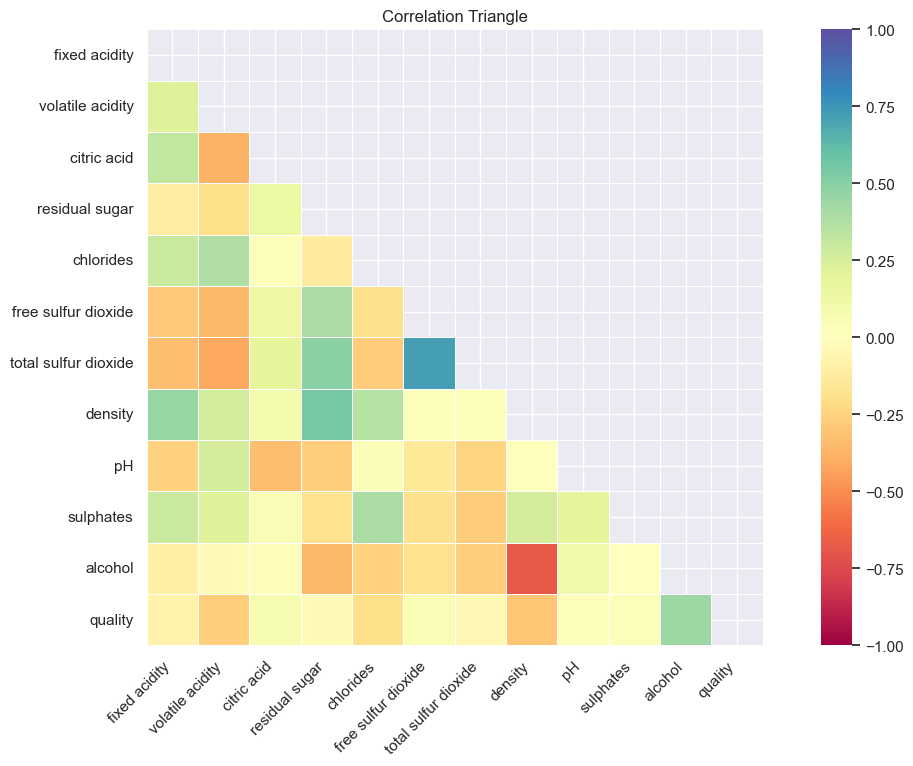

In [102]:
###Heat map for all data points 

#clean data set so there are no string values
no_strings = allwine_base_df.drop(columns=["wine_type","quality_label","sweetness"])

#correlation map
corrmap = no_strings.corr()
# Generate a mask for the upper triangular part
mask = np.triu(np.ones_like(corrmap, dtype=bool))

#plot heatmap triangle 
ax = sns.heatmap(
    corrmap, mask = mask,
    vmin=-1, vmax=1, center=0,
    cmap="Spectral",
    square=True,
    linewidths=0.5
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.title("Correlation Triangle")
sns.set(rc = {'figure.figsize':(15,8)})

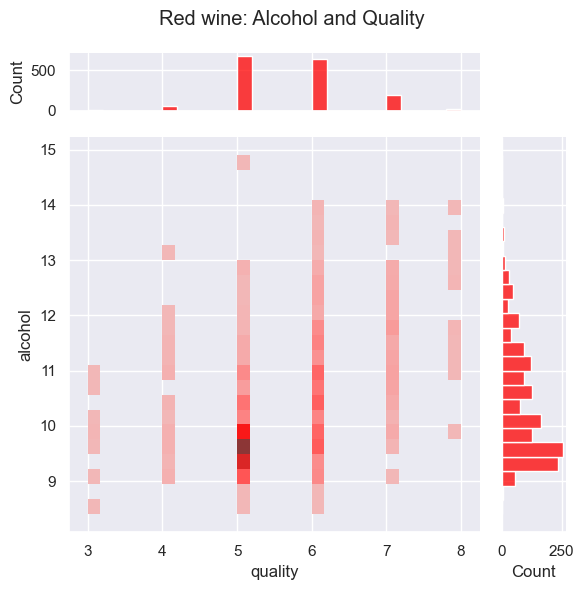

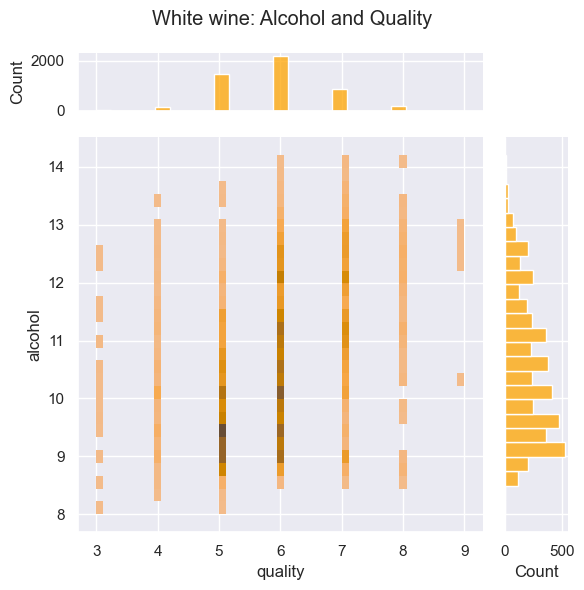

In [103]:
#alcohol and quality seem to be correlated, plot alcohol vs quality, add red white hue

#Joint plot not a good pick
#average the alcohol across each quality, then plot this on a line graph

#red wine:

redwine_jointplt = sns.jointplot(data = red_base_df, x = "quality", y="alcohol", kind = "hist", color="red",
              marginal_ticks= True,
               marginal_kws=dict(bins=25, fill=True))

redwine_jointplt.fig.suptitle("Red wine: Alcohol and Quality")
redwine_jointplt.fig.tight_layout()

#white wine:
redwine_jointplt = sns.jointplot(data = white_base_df, x = "quality", y="alcohol", kind = "hist", color="orange",
              marginal_ticks= True,
               marginal_kws=dict(bins=25, fill=True))

redwine_jointplt.fig.suptitle("White wine: Alcohol and Quality")
redwine_jointplt.fig.tight_layout()




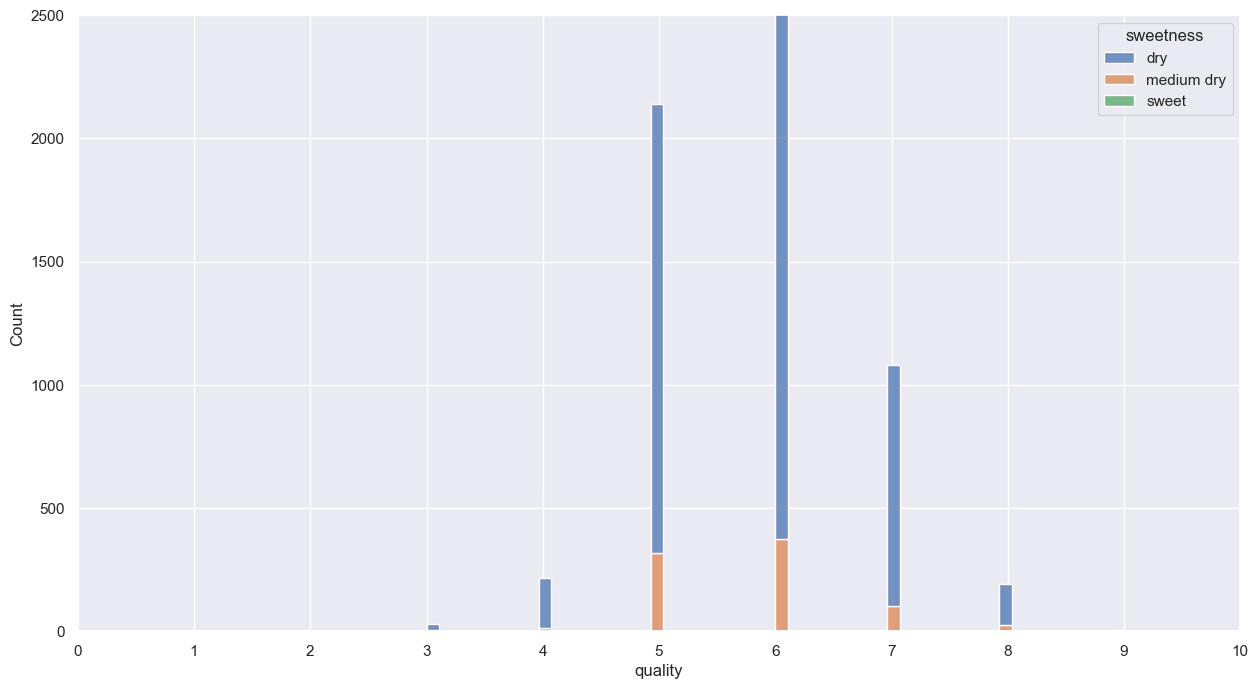

In [104]:
#plot rating against sugar rating 
allwine_base_df.head(10)
sweetness_hist = sns.histplot(data=allwine_base_df, x = "quality", color = "red",hue="sweetness", multiple= "stack")
sweetness_hist.set_xticks([0,1,2,3,4,5,6,7,8,9,10])
sweetness_hist.set_ylim(0,2500)
plt.show()



#plt.title('Clustered Bar Chart')
#plt.xlabel('Group')


<Axes: xlabel='sweetness', ylabel='quality'>

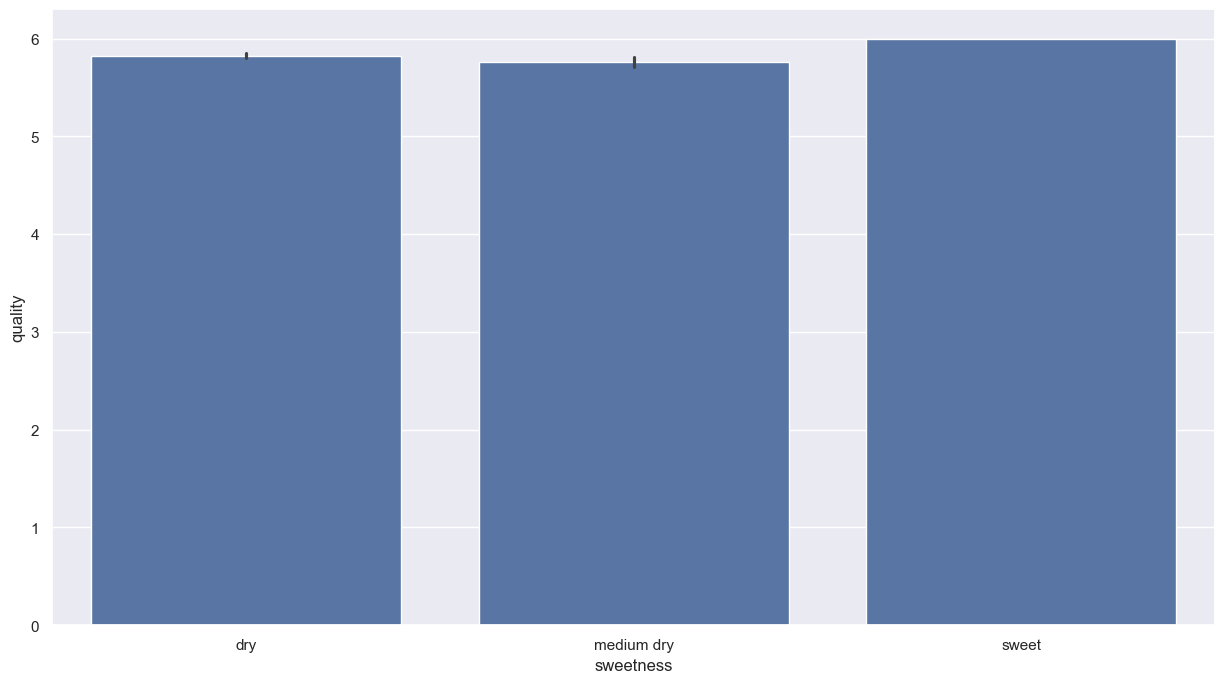

In [105]:
sns.barplot(allwine_base_df, x="sweetness", y="quality")

In [106]:
all_sweets = allwine_base_df[allwine_base_df["sweetness"] == "sweet"]

print(len(all_sweets))



1


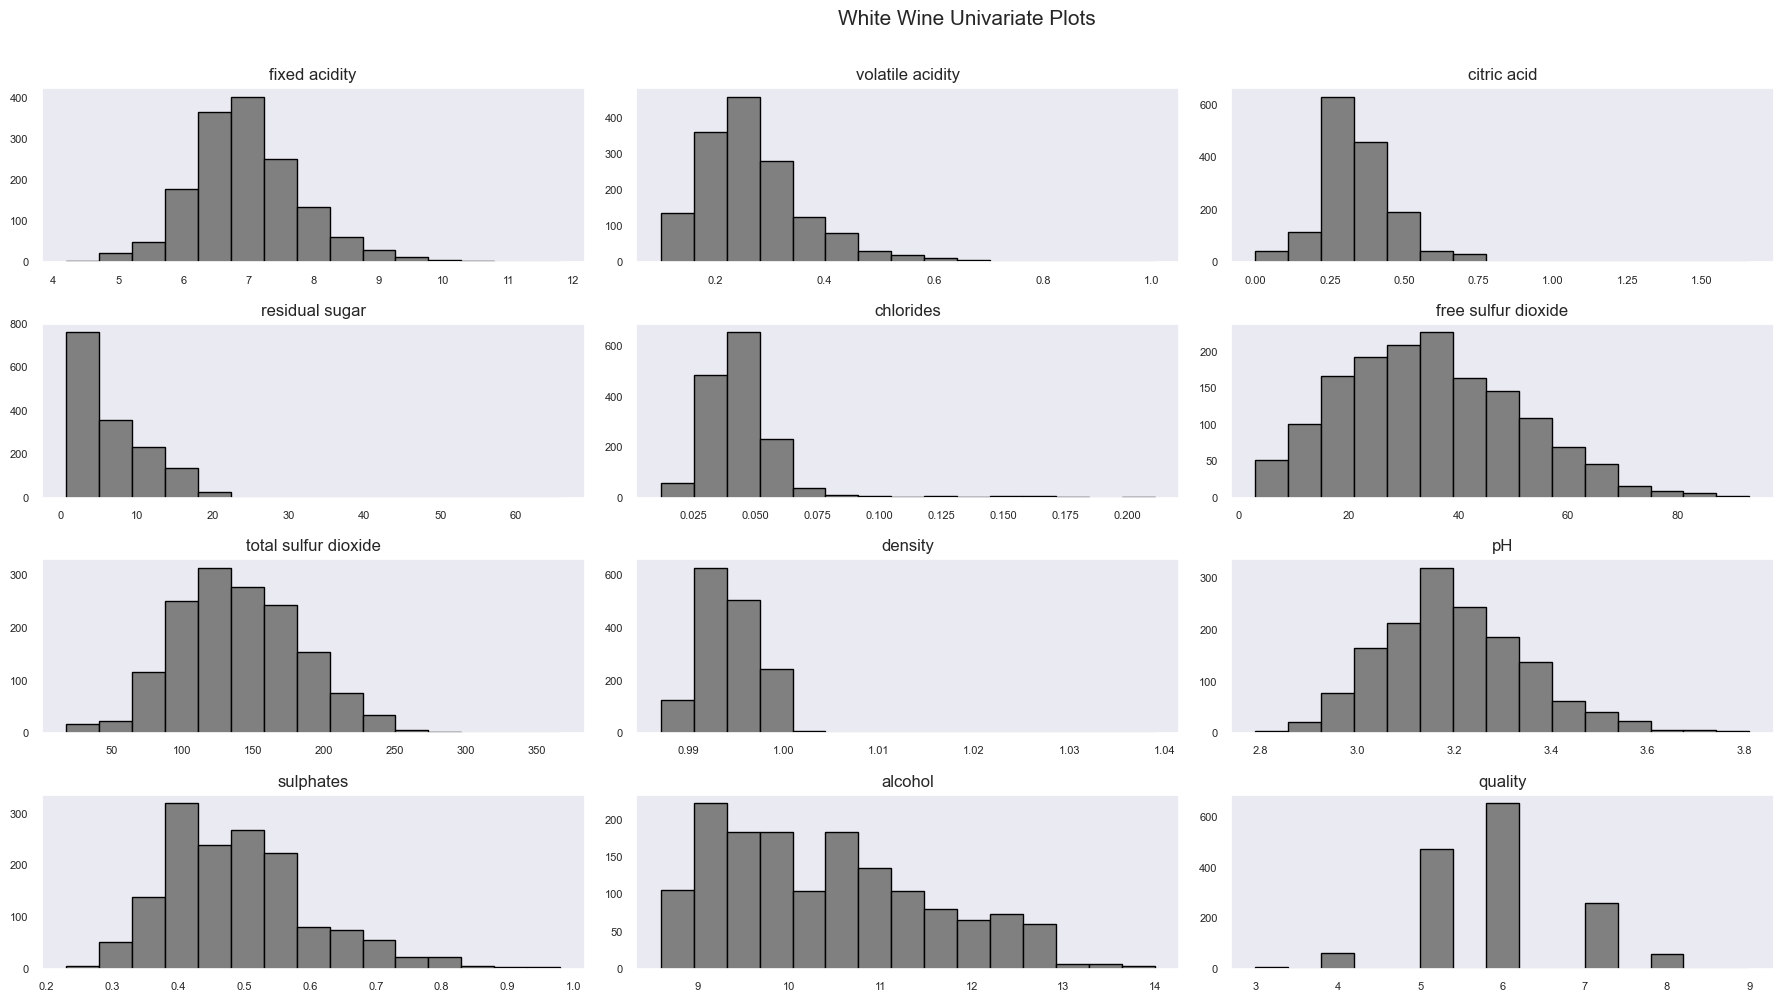

In [107]:
w_med_quality = allwine_base_df[(allwine_base_df["quality_label"] == "medium") & (allwine_base_df["wine_type"] =="white")]
w_med_quality.head(10)
w_med_quality.hist(bins=15, color='grey', edgecolor='black',
                linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

rt = plt.suptitle('White Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

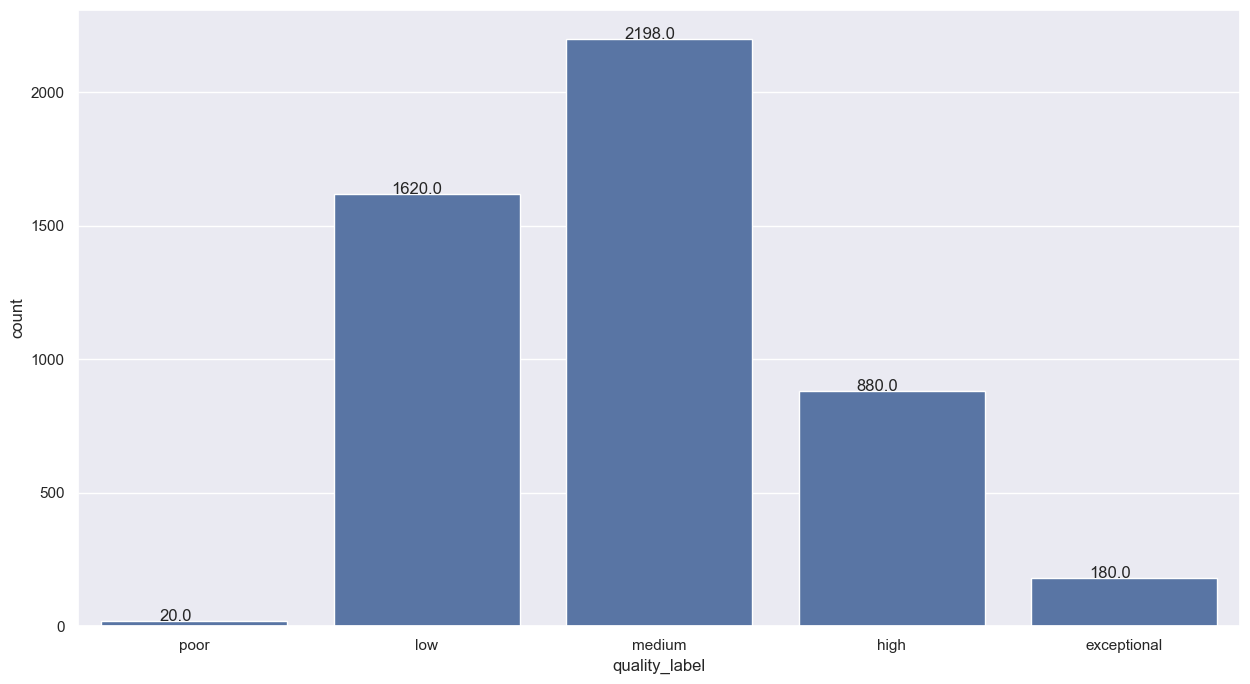

In [108]:
#Make a count plot for low medium high to see number of data points

ax = sns.countplot(data=allwine_base_df, x="quality_label")
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))


#Conclusion: added two new labels to provide a better classification of data
#"poor" wines can be excluded from analysis as the population is too small (less than 30)

ANOVA test for mean alcohol levels across wine samples with different quality ratings
F Statistic: nan 	p-value: nan


c:\Users\Leon\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


<Axes: xlabel='quality_label', ylabel='alcohol'>

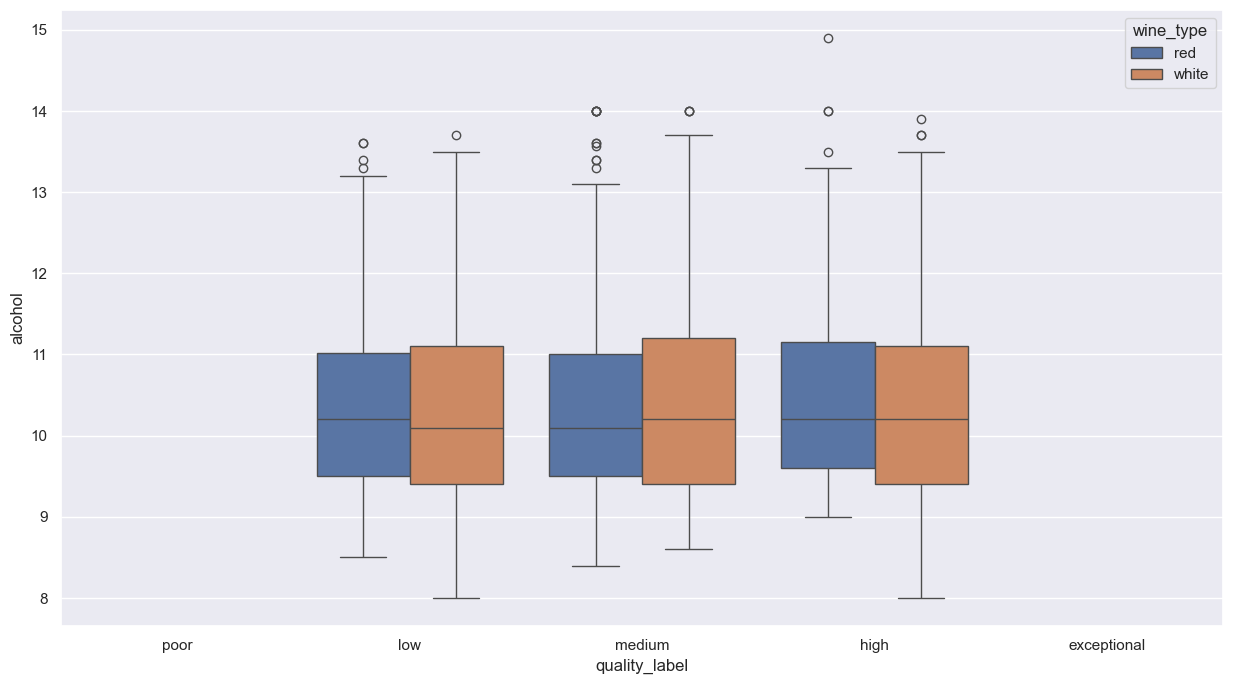

In [140]:


#allwine_base_df.head(10)
##Could exclude poor quality wines because of the sample size
F, p = stats.f_oneway(no_poorandexcept[no_poorandexcept['quality_label'] == 'low']['alcohol'],
no_poorandexcept[no_poorandexcept['quality_label'] == 'medium']['alcohol'],
no_poorandexcept[no_poorandexcept['quality_label'] == 'high']['alcohol'],
no_poorandexcept[no_poorandexcept['quality_label'] == 'exceptional']['alcohol'])
print('ANOVA test for mean alcohol levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

#Conclusion
##incredibly low F statistic, and a p value above 0.05, meaning we have to accept the null hypothesis;
#The difference between the groups is not statistically significant
#Also reflected by box plot 

#boxplot the alcohol level, hue the wine type and make a p value calculation for the trend
sns.boxplot(data=no_poorandexcept, x="quality_label", y="alcohol", hue="wine_type")



In [110]:


#allwine_base_df.head(10)
##Could exclude poor quality wines because of the sample size
F, p = stats.f_oneway(allwine_base_df[allwine_base_df['sweetness'] == 'dry']['quality'],
allwine_base_df[allwine_base_df['sweetness'] == 'medium dry']['quality'],
allwine_base_df[allwine_base_df['sweetness'] == 'sweet']['quality'])
print('ANOVA test for mean quality across wine types samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

#Sweetness does not correlate with quality!

ANOVA test for mean quality across wine types samples with different quality ratings
F Statistic: 2.162527513669854 	p-value: 0.11511683577565324


In [111]:
allwine_base_df.head(10)

,wine_type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,sweetness
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,medium,dry
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,medium,dry
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,medium,dry
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium,dry
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,medium,dry
5,red,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,medium,dry
6,red,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,medium,dry
7,red,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,medium,dry
8,red,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,medium,dry
9,red,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,medium,dry


ANOVA test for mean pH across wine samples with different quality ratings
F Statistic: 0.17188982574322703 	p-value: 0.8420772417104492


<Axes: xlabel='quality_label', ylabel='pH'>

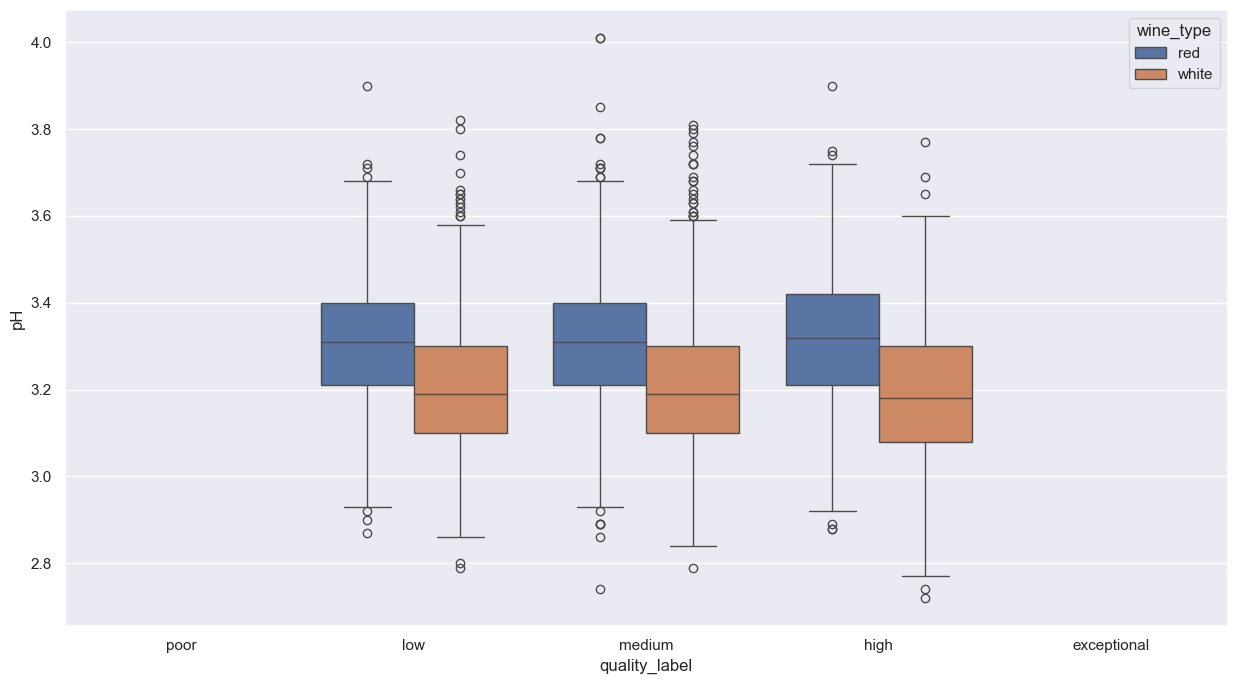

In [131]:
#Exploring the effect of pH on quality


F, p = stats.f_oneway(no_poorandexcept[no_poorandexcept['quality_label'] == 'low']['pH'],
no_poorandexcept[no_poorandexcept['quality_label'] == 'medium']['pH'],
no_poorandexcept[no_poorandexcept['quality_label'] == 'high']['pH'])
#allwine_base_df[allwine_base_df['quality_label'] == 'exceptional']['pH'])
print('ANOVA test for mean pH across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

#boxplot the alcohol level, hue the wine type and make a p value calculation for the trend
sns.boxplot(data=no_poorandexcept, x="quality_label", y="pH", hue="wine_type")

#pH does not correlate with quality.
#However, it is clear that red wines tend to be more acidic than white wines 

ANOVA test for mean density across wine samples with different quality ratings
F Statistic: 2.317553351196089 	p-value: 0.0986270110442689


<Axes: xlabel='quality_label', ylabel='density'>

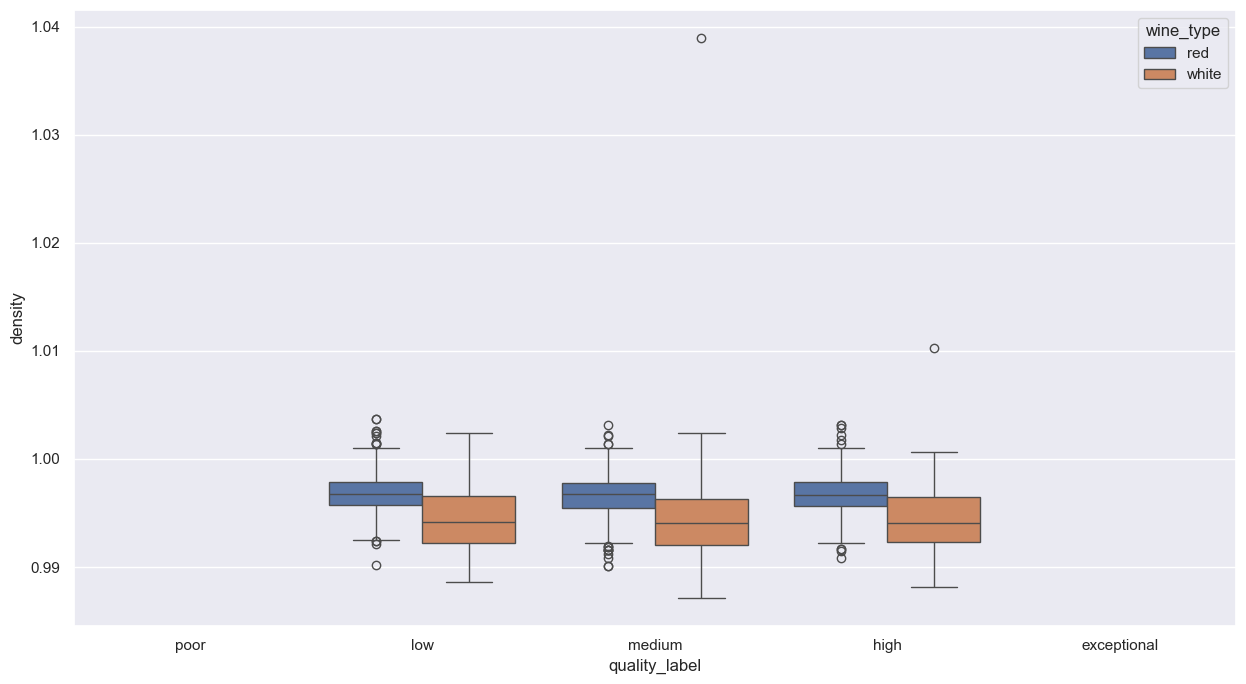

In [129]:
#Exploring the effect of density on wine quality 

F, p = stats.f_oneway(no_poorandexcept[no_poorandexcept['quality_label'] == 'low']['density'],
no_poorandexcept[no_poorandexcept['quality_label'] == 'medium']['density'],
no_poorandexcept[no_poorandexcept['quality_label'] == 'high']['density'])
#no_poorandexcept[no_poorandexcept['quality_label'] == 'exceptional']['density'])
print('ANOVA test for mean density across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

#Almost significant 

#boxplot the alcohol level, hue the wine type and make a p value calculation for the trend
sns.boxplot(data=no_poorandexcept, x="quality_label", y="density", hue="wine_type")

#The variance between the groups isnt large enough to make a concrete inference 
#However, we can observe that red wines clearly vary less in density than with white wines


#only_reds = allwine_base_df.query("wine_type == 'red'")
#sns.boxplot(data=only_reds, x="quality_label", y="density")

ANOVA test for mean volatile acidity across wine samples with different quality ratings
F Statistic: 2.190605045154882 	p-value: 0.1119633624158177


<Axes: xlabel='quality_label', ylabel='volatile acidity'>

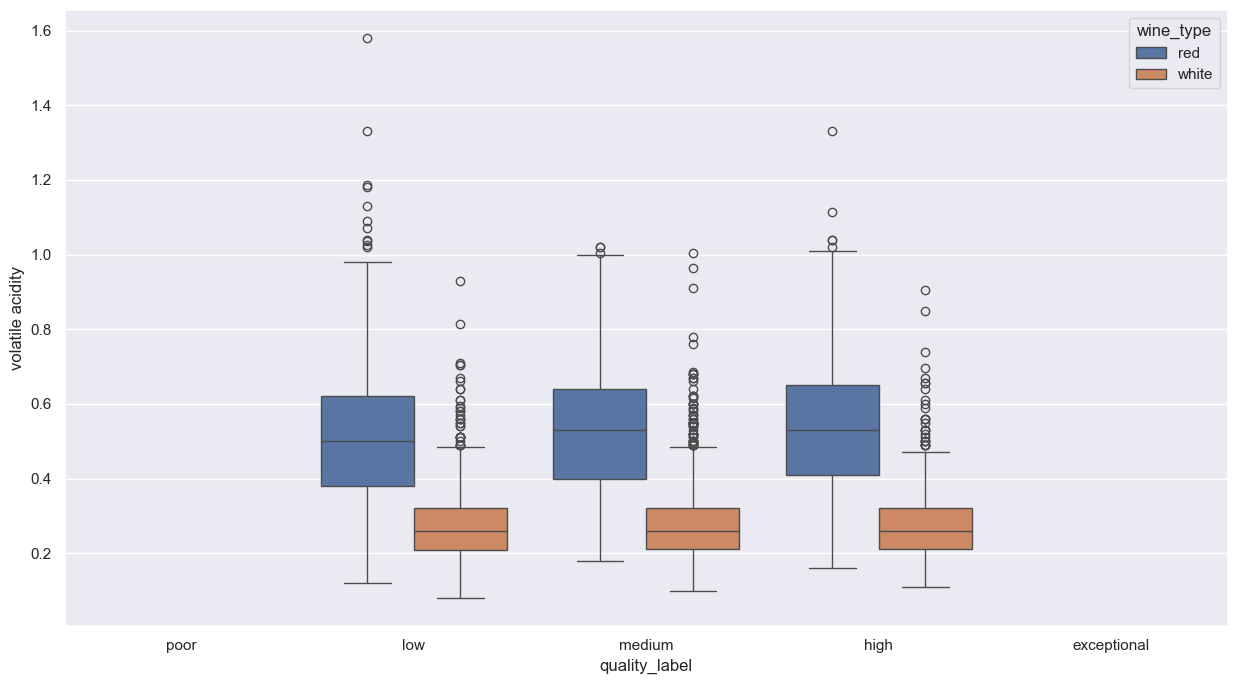

In [128]:
#Exploring the effect of volatile acidity on quality
F, p = stats.f_oneway(no_poorandexcept[no_poorandexcept['quality_label'] == 'low']['volatile acidity'],
no_poorandexcept[no_poorandexcept['quality_label'] == 'medium']['volatile acidity'],
no_poorandexcept[no_poorandexcept['quality_label'] == 'high']['volatile acidity'])
#allwine_base_df[allwine_base_df['quality_label'] == 'exceptional']['volatile acidity'])
print('ANOVA test for mean volatile acidity across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)


#boxplot the alcohol level, hue the wine type and make a p value calculation for the trend
sns.boxplot(data=no_poorandexcept, x="quality_label", y="volatile acidity", hue="wine_type")

#Although the mean volatile acidity differs across different wine qualities, 
# the variance overlap is far too great to infer a trend.

In [118]:
allwine_base_df.head(10)

,wine_type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,sweetness
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,medium,dry
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,medium,dry
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,medium,dry
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium,dry
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,medium,dry
5,red,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,medium,dry
6,red,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,medium,dry
7,red,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,medium,dry
8,red,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,medium,dry
9,red,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,medium,dry


ANOVA test for mean volatile acidity across wine samples with different quality ratings
F Statistic: 0.007985404551198557 	p-value: 0.9920464075675295


<Axes: xlabel='quality_label', ylabel='total sulfur dioxide'>

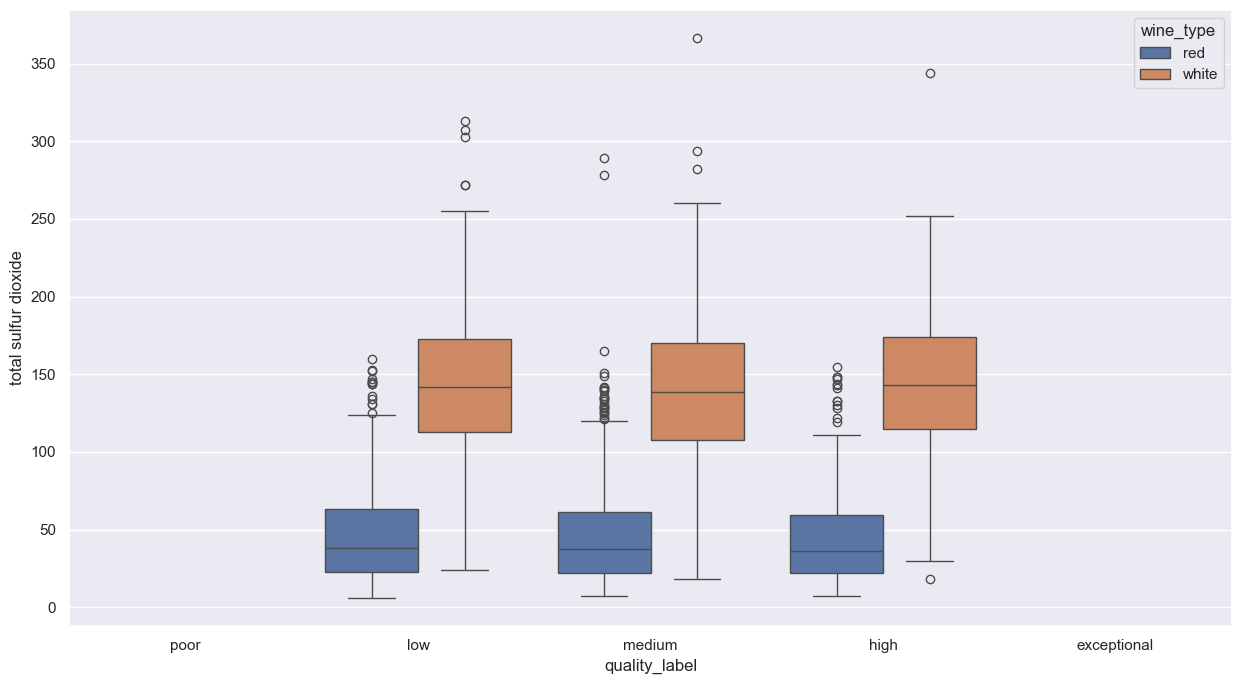

In [133]:
#Exploring the effect of total sulfur dioxide on quality
F, p = stats.f_oneway(no_poorandexcept[no_poorandexcept['quality_label'] == 'low']['total sulfur dioxide'],
no_poorandexcept[no_poorandexcept['quality_label'] == 'medium']['total sulfur dioxide'],
no_poorandexcept[no_poorandexcept['quality_label'] == 'high']['total sulfur dioxide'])
#allwine_base_df[allwine_base_df['quality_label'] == 'exceptional']['total sulfur dioxide'])
print('ANOVA test for mean volatile acidity across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)


#boxplot the alcohol level, hue the wine type and make a p value calculation for the trend
sns.boxplot(data=no_poorandexcept, x="quality_label", y="total sulfur dioxide", hue="wine_type")



<class 'pandas.core.frame.DataFrame'>
Index: 4698 entries, 0 to 4897
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   wine_type             4698 non-null   category
 1   fixed acidity         4698 non-null   float64 
 2   volatile acidity      4698 non-null   float64 
 3   citric acid           4698 non-null   float64 
 4   residual sugar        4698 non-null   float64 
 5   chlorides             4698 non-null   float64 
 6   free sulfur dioxide   4698 non-null   float64 
 7   total sulfur dioxide  4698 non-null   float64 
 8   density               4698 non-null   float64 
 9   pH                    4698 non-null   float64 
 10  sulphates             4698 non-null   float64 
 11  alcohol               4698 non-null   float64 
 12  quality               4698 non-null   int64   
 13  quality_label         4698 non-null   category
 14  sweetness             4698 non-null   category
dtypes: catego

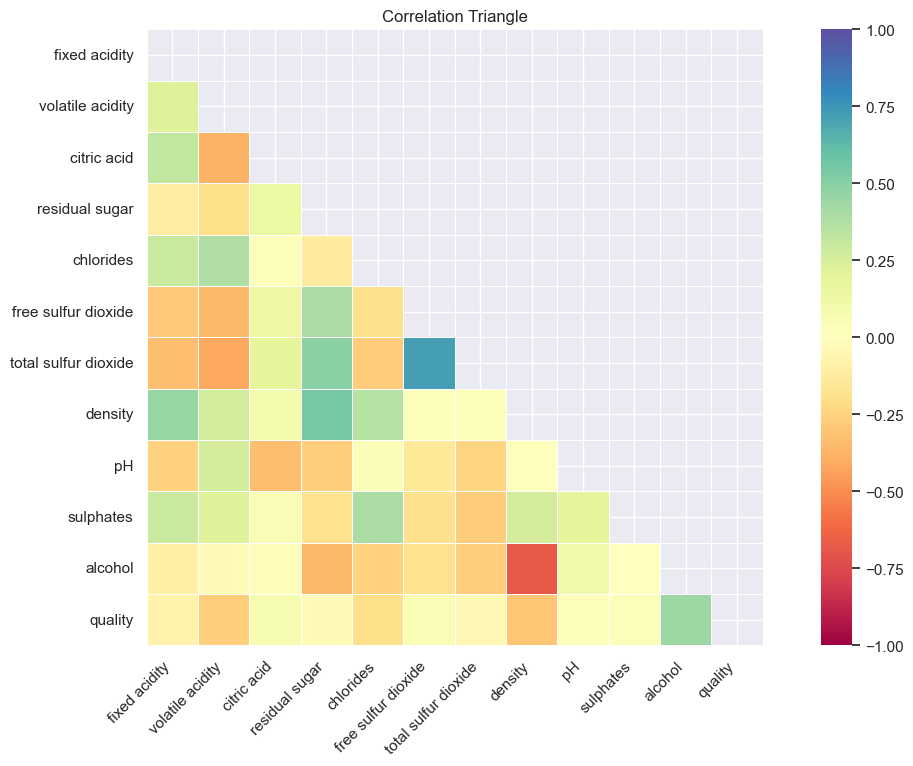

In [138]:

#all_highs = no_poorandexcept.query("quality_label == 'high'")


###Heat map for all data points 

#clean data set so there are no string values
highs_no_strings = no_poorandexcept.drop(columns=["wine_type","quality_label","sweetness"])

#correlation map
corrmap = no_strings.corr()
# Generate a mask for the upper triangular part
mask = np.triu(np.ones_like(corrmap, dtype=bool))

#plot heatmap triangle 
ax = sns.heatmap(
    corrmap, mask = mask,
    vmin=-1, vmax=1, center=0,
    cmap="Spectral",
    square=True,
    linewidths=0.5
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.title("Correlation Triangle")
sns.set(rc = {'figure.figsize':(15,8)})

no_poorandexcept.info()